<a href="https://colab.research.google.com/github/swapnalishamrao/Unsupervised_ML_Clustering_Project/blob/main/Netflix_Movies_and_Tv_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='blue'>**<u>Netflix Movies and Tv Shows Clustering<u>**  

#### **Project Type**  - Unsupervised ML
#### **Contribution**  - Individual
#### **Name**          - Swapnali Shamrao Mane

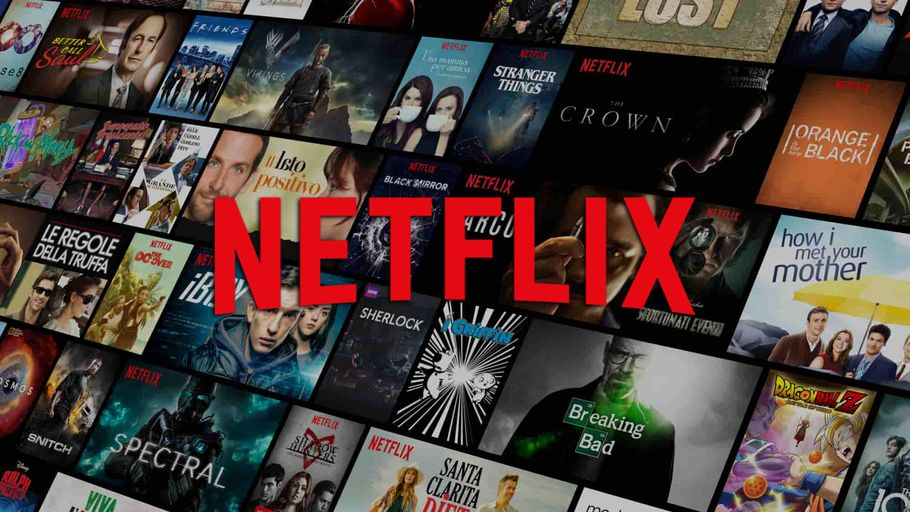

### <font size='8px'><font color='#grey'>**<u>Project Summary:-<u>**

**1.Project Objective**: The project aimed to group similar movies and TV shows on Netflix into clusters based on their content.

**2.Data Source**: Data was collected from a third-party Netflix search engine, providing details on over 7,000 Netflix titles.

**3.Data Description**: The dataset included information such as title, director, cast, country, date added, rating, and release year. Some data fields had missing values, which were addressed.

**4.Data Preprocessing**: Missing values were filled with placeholders like "Unavailable." The "date_added" feature was converted to datetime, and additional date-related features were created. Outliers in the "release year" were handled using the interquartile range.

**5.Data Analysis and Insights**:

* Netflix had more movies (69.14%) than TV shows (30.86%).
* Majority of movies were released between 2015 and 2020, while TV shows peaked between 2018 and 2020.
* 2017 was a significant year for movie releases, and 2020 for TV shows.
* Netflix shifted focus to releasing more TV shows than movies in 2020.
* Peak content additions occurred in 2019, with regular additions throughout the year.
* Most common content rating was TV-MA, followed by TV-14.
* The United States produced most movies on Netflix, with India in second place.
* The United States and the United Kingdom dominated TV show production.
* Raul Campos and Jan Suter directed many Netflix movies, while Alastair Fothergill was prominent in TV shows.
* International movies and dramas were popular content on Netflix.
* Common actors in Netflix content included Lee, Michel, David, Jhon, and James.
* Some correlations were observed between release year and day added, indicating Netflix's growth.

**6.Text Data Processing**: Text data from the description was cleaned by removing punctuation, stopwords, and digits. It was then converted into a TF-IDF matrix for clustering.

**7.Clustering Models**:

* Various clustering algorithms, including K-Means, Hierarchical, and DBSCAN, were applied.
* Out of all the methods we tried, the K-Means clustering model was the best at this job. It had a high score, which means it did a good job at putting similar things together.
* K-Means clustering performed the best with high Calinski-Harabasz and silhouette scores.

**8.Challenges Faced**:

Identifying the optimal number of clusters was challenging.
Methods like the Kelbow method and silhouette score took time to provide results.

**9.Project Outcome**: The project successfully organized Netflix movies and TV shows into clusters, making it easier for users to find content that suits their preferences.

**10.Conclusion**: Despite challenges, the project achieved its goal of clustering Netflix content effectively, enhancing the user experience on the platform.